<a href="https://colab.research.google.com/github/Viveek1218/CODSOFT/blob/main/IMDB_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RATING PREDICTION WITH ML AND PYTHON

#### The goal is to analyze historical movie data and develop a machine learning model that accurately estimates the rating given to a movie by users or critics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

### Load the data

In [2]:
#Creating a dataframe
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

In [3]:
#Display the dataframe
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(15509, 10)

### Data Cleaning

In [5]:
# Display a summary of the DataFrame's structure and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
# Count and display the number of missing values (NaN) in each column of the DataFrame.
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [7]:
# Count and display the total number of duplicate rows in the DataFrame.
df.duplicated().sum()

6

In [8]:
#Handling the null values
df.dropna(inplace=True)

In [9]:
#Handling duplicate values
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
#Shape of the DataFrame after handling missing and duplicate values
df.shape

(5659, 10)

In [12]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
#Converting data to correct data types

# Remove parentheses from 'Year' and convert to integers
df['Year'] = (
    df['Year']
    .str.replace(r'\(|\)', '', regex=True)  # Remove parentheses
    .astype('Int64')  # Use 'Int64' to handle NaNs (nullable integer type)
)

# Convert 'Duration' to numeric by removing ' min'
df['Duration'] = (
    df['Duration']
    .str.replace(' min', '', regex=False)  # Remove ' min'
    .str.strip()  # Remove any leading/trailing spaces
    .astype(float)  # Convert to numeric
)

# Convert 'Votes' to numeric by removing commas
df['Votes'] = (
    df['Votes']
    .str.replace(',', '', regex=False)  # Remove commas
    .str.strip()  # Remove any leading/trailing spaces
    .astype(int)  # Convert to numeric
)

In [14]:
# Data types of each column in the DataFrame
df.dtypes

,0
Name,object
Year,Int64
Duration,float64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   Int64  
 2   Duration  5659 non-null   float64
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(6)
memory usage: 491.8+ KB


In [17]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115.0,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153.0,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# Exploratory Data Analysis (EDA)

### Descriptive Data Analysis

In [26]:
# Descriptive Statistics for all columns
print("Descriptive statistics for all columns: ")
df.describe(include='all')

Descriptive statistics for all columns: 


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.0,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,<NA>,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,<NA>,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,<NA>,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.24757,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.0,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.0,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.0,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.0,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


### Data Visualization

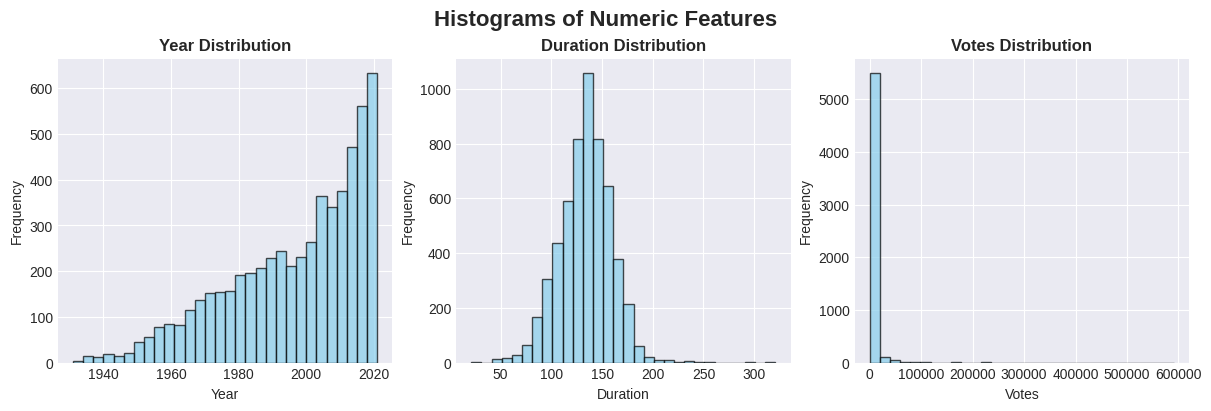

In [45]:
# Creating histograms for numerical features

plt.style.use('seaborn-v0_8-darkgrid')

# Create histograms for selected numeric features
numeric_features = ['Year', 'Duration', 'Votes']
fig, axes = plt.subplots(1, len(numeric_features), figsize=(12, 4), constrained_layout=True)

# Customize each subplot
for i, feature in enumerate(numeric_features):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature} Distribution', fontsize=12, weight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Add a main title
fig.suptitle('Histograms of Numeric Features', fontsize=16, weight='bold')

# Display the plot
plt.show()

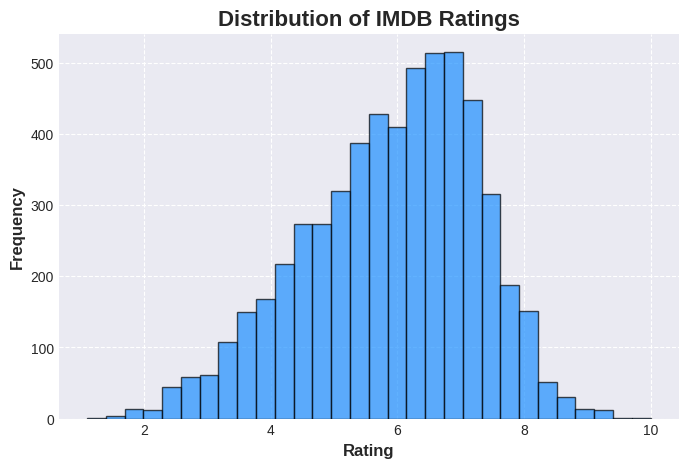

In [73]:
#Histogram to visualize the distribution of movie ratings

plt.style.use('seaborn-v0_8-darkgrid')

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Rating'], bins=30, color='dodgerblue', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Distribution of IMDB Ratings', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')

plt.grid(visible=True, linestyle='--')

# Display the plot
plt.show()

<ipython-input-50-d88398eebe74>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis', edgecolor='black')


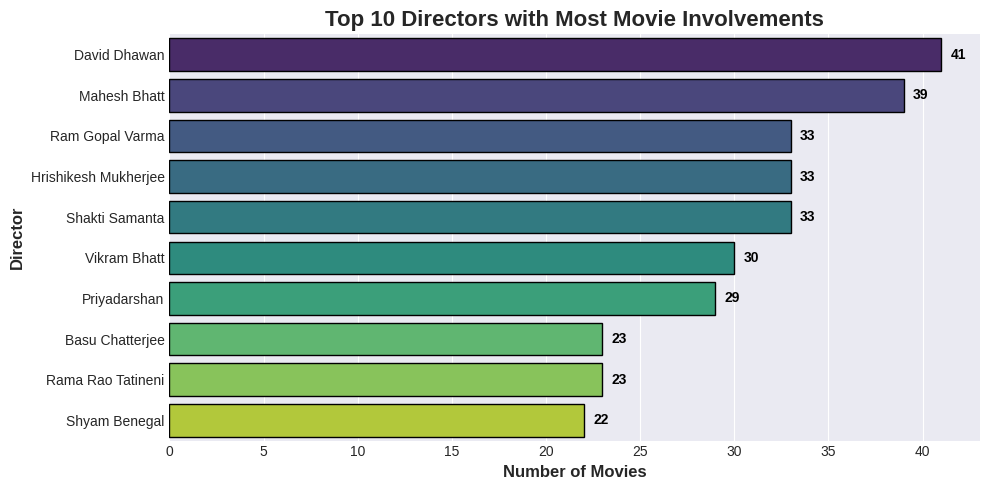

In [50]:
# Visualize the top 10 directors with the most movie involvements

# Prepare the data
top_10_directors = df['Director'].value_counts(ascending=False).head(10)

# Set up the figure and style
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis', edgecolor='black')

# Add a title and axis labels with enhanced formatting
plt.title('Top 10 Directors with Most Movie Involvements', fontsize=16, weight='bold')
plt.xlabel('Number of Movies', fontsize=12, weight='bold')
plt.ylabel('Director', fontsize=12, weight='bold')

# Add value annotations to each bar
for i, value in enumerate(top_10_directors.values):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10, color='black', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-51-5940e9479e86>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='coolwarm', edgecolor='black')


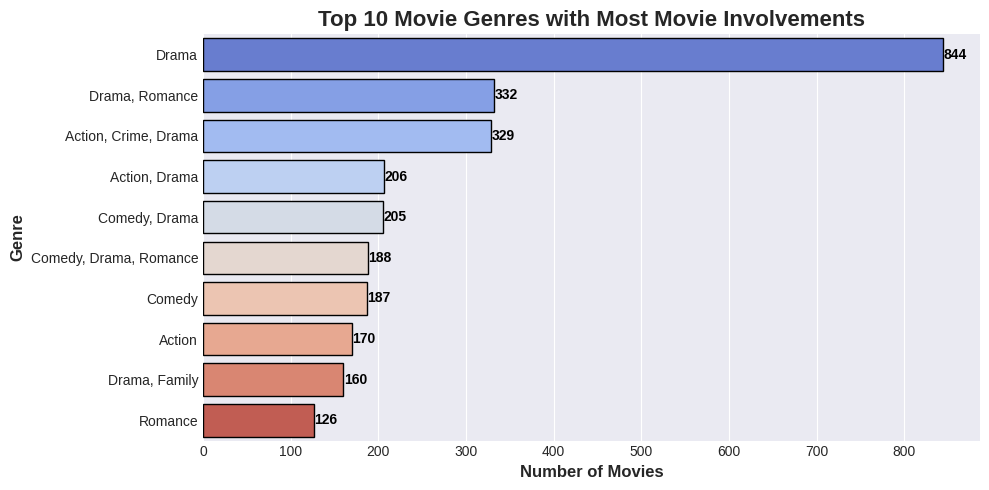

In [51]:
# Visualize the top 10 movie genres with the most movie involvements

# Prepare the data
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)

# Set up the figure and style
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='coolwarm', edgecolor='black')

# Add title and axis labels with better formatting
plt.title('Top 10 Movie Genres with Most Movie Involvements', fontsize=16, weight='bold')
plt.xlabel('Number of Movies', fontsize=12, weight='bold')
plt.ylabel('Genre', fontsize=12, weight='bold')

# Add value annotations to each bar
for i, value in enumerate(top_10_genres.values):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10, color='black', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-61-02ecca920891>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis', edgecolor='black')


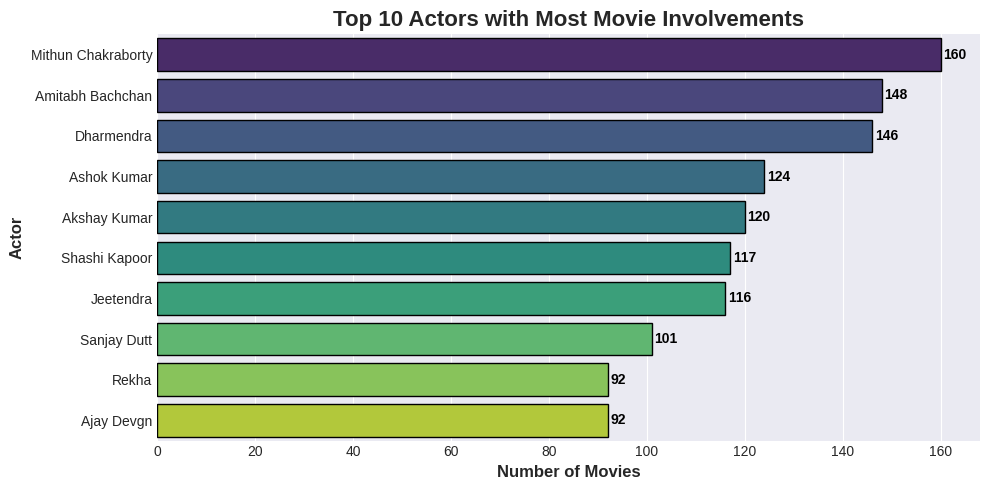

In [61]:
# Plotting the top 10 actors

# Combine the three actor columns into one Series and count occurrences
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)

# Plotting the top 10 actors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis', edgecolor='black')

# Add title and axis labels
plt.title('Top 10 Actors with Most Movie Involvements', fontsize=16, weight='bold')
plt.xlabel('Number of Movies', fontsize=12, weight='bold')
plt.ylabel('Actor', fontsize=12, weight='bold')

# Add value annotations to each bar
for i, value in enumerate(top_10_actors.values):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10, color='black', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

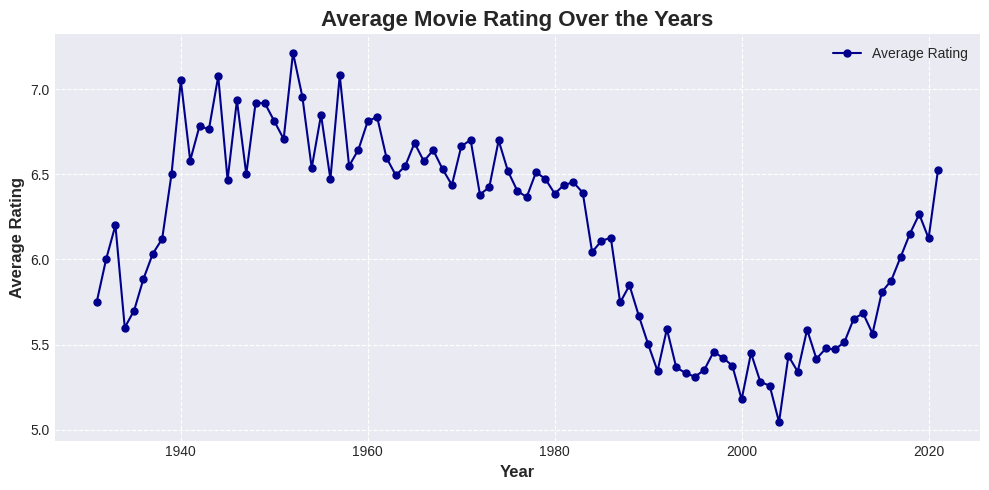

In [80]:
# Average Rating over the years

# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(
    average_rating_per_year['Year'],
    average_rating_per_year['Average Rating'],
    linestyle='-',
    color='darkblue',
    marker='o',
    markersize=5,
    label='Average Rating'
)

# Adding title, labels, and legend
plt.title('Average Movie Rating Over the Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Average Rating', fontsize=12, weight='bold')
plt.legend(loc='upper right', fontsize=10)

# Adding gridlines and improve layout
plt.grid(visible = True, linestyle = '--')
plt.tight_layout()

# Display the plot
plt.show()

In [82]:
# Filter movies with ratings greater than 8.5
high_rating_movies = df[df['Rating'] > 8.5]

# Select relevant columns and sort by Rating in descending order
high_rating_movies_details = high_rating_movies[['Name', 'Year', 'Rating', 'Director', 'Genre']].sort_values(by='Rating', ascending=False)

# Display the results
high_rating_movies_details.reset_index(drop=True, inplace=True)
high_rating_movies_details.head(10)  # Display the top 10 for brevity

,Name,Year,Rating,Director,Genre
0,Love Qubool Hai,2020,10.0,Saif Ali Sayeed,"Drama, Romance"
1,Half Songs,2021,9.7,Sriram Raja,"Music, Romance"
2,June,2021,9.4,Suhrud Godbole,Drama
3,Gho Gho Rani,2019,9.4,Munni Pankaj,"History, Romance"
4,The Reluctant Crime,2020,9.4,Arvind Pratap,Drama
5,Refl3ct,2021,9.3,Nikhil Mahar,Sci-Fi
6,Secrets of Sinauli,2021,9.3,Raghav Jairath,"Documentary, History"
7,Love Sorries,2021,9.3,Gautam Joshi,"Comedy, Drama, Romance"
8,Baikunth,2021,9.3,Vishwa Bhanu,Family
9,Ashok Vatika,2018,9.3,Rahul Mallick,Drama


In [85]:
# Group movies by Rating and count the number of movies
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()

# Rename columns for clarity
rating_counts.columns = ['Rating', 'Number of Movies']

# Sort the result by Rating in descending order
rating_counts = rating_counts.sort_values(by='Rating', ascending=False).reset_index(drop=True)

# Display the result
rating_counts.head(10)  # Display the top 10 ratings for brevity

,Rating,Number of Movies
0,10.0,1
1,9.7,1
2,9.4,3
3,9.3,7
4,9.2,2
5,9.1,4
6,9.0,5
7,8.9,5
8,8.8,6
9,8.7,8


### Correlation Analysis

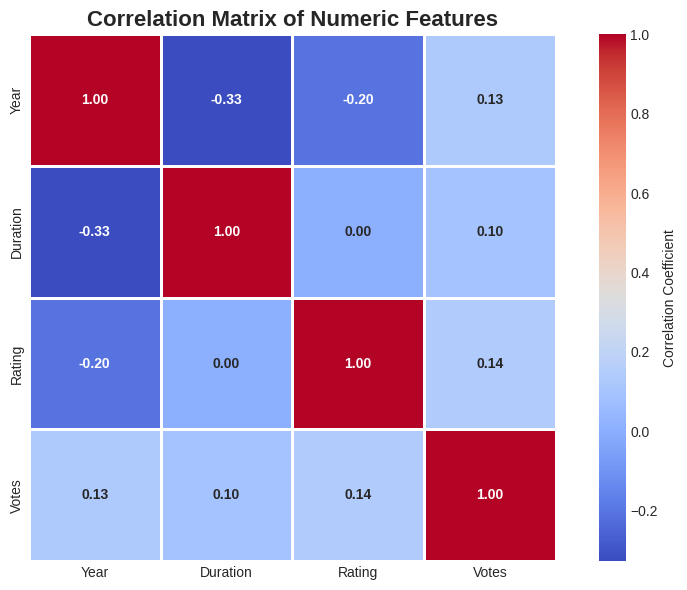

In [97]:
#Relationship between numeric variables

# Drop unnecessary columns and calculate the correlation matrix
new_df = df.drop(columns=['Name', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'])
corr = new_df.corr()

# Set up the figure and plot
plt.figure(figsize=(9, 6))

# Create the heatmap with improved aesthetics
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidth=0.8,
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={'size': 10, 'weight': 'bold'},
    square=True,  # Ensure square layout
)

# Add title and adjust layout
plt.title('Correlation Matrix of Numeric Features', fontsize=16, weight='bold')
plt.tight_layout()

# Display the plot
plt.show()

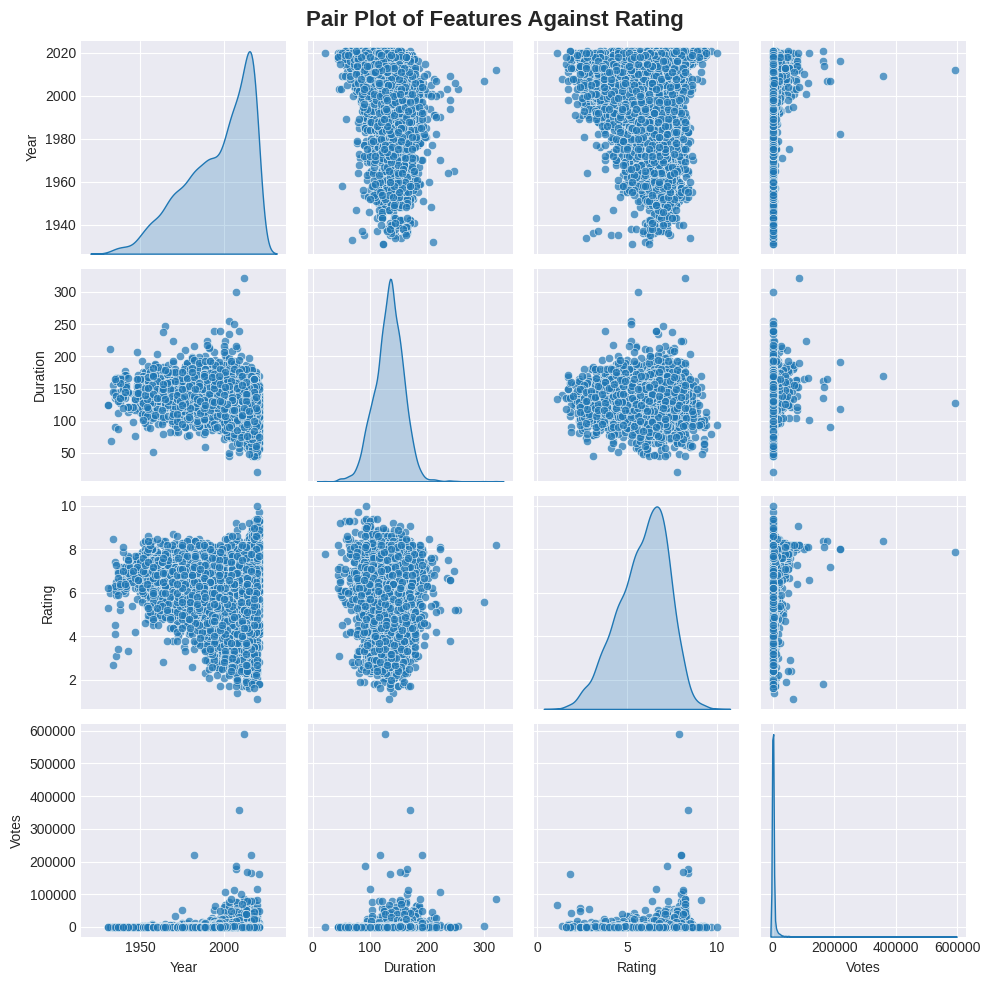

In [106]:
# Generate pair plot with KDE on the diagonal
sns.pairplot(
    new_df,
    diag_kind='kde',  # KDE on the diagonal
    plot_kws={'alpha': 0.7},  # Adjust transparency
    height=2.5  # Set the size of each plot
)

# Adding title
plt.suptitle('Pair Plot of Features Against Rating', fontsize=16, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

# Feature Engineering

In [107]:
# Drop the Name column
df= df.drop('Name',axis=1)

In [109]:
# Calculate average rating for each genre, director, and actor
genre_avg_rating = df.groupby('Genre')['Rating'].mean()
director_avg_rating = df.groupby('Director')['Rating'].mean()
actor1_avg_rating = df.groupby('Actor 1')['Rating'].mean()
actor2_avg_rating = df.groupby('Actor 2')['Rating'].mean()
actor3_avg_rating = df.groupby('Actor 3')['Rating'].mean()

# Map the averages back to the DataFrame
df['Genre_Average_Rating'] = df['Genre'].map(genre_avg_rating)
df['Director_Average_Rating'] = df['Director'].map(director_avg_rating)
df['Actor1_Average_Rating'] = df['Actor 1'].map(actor1_avg_rating)
df['Actor2_Average_Rating'] = df['Actor 2'].map(actor2_avg_rating)
df['Actor3_Average_Rating'] = df['Actor 3'].map(actor3_avg_rating)

# Handle missing values: fill NaN with the movie's own rating
df['Genre_Average_Rating'] = df['Genre_Average_Rating'].fillna(df['Rating'])
df['Director_Average_Rating'] = df['Director_Average_Rating'].fillna(df['Rating'])
df['Actor1_Average_Rating'] = df['Actor1_Average_Rating'].fillna(df['Rating'])
df['Actor2_Average_Rating'] = df['Actor2_Average_Rating'].fillna(df['Rating'])
df['Actor3_Average_Rating'] = df['Actor3_Average_Rating'].fillna(df['Rating'])

# Check the resulting DataFrame
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000


# Data Splitting

In [111]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
X = df[['Year', 'Votes', 'Duration', 'Genre_Average_Rating',
        'Director_Average_Rating', 'Actor1_Average_Rating',
        'Actor2_Average_Rating', 'Actor3_Average_Rating']]
y = df['Rating']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (4527, 8)
Testing features shape: (1132, 8)
Training target shape: (4527,)
Testing target shape: (1132,)


## Model Selection

### Model Building

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Build a Linear Regression model
fitted_model_lr = LinearRegression()
# Train the model
fitted_model_lr.fit(X_train, y_train)
# Make predictions
y_pred_lr = fitted_model_lr.predict(X_test)

# Build a Random Forest Regressor model
fitted_model_rf = RandomForestRegressor(random_state=42)  # Added random_state for reproducibility
# Train the model
fitted_model_rf.fit(X_train, y_train)
# Make predictions
y_pred_rf = fitted_model_rf.predict(X_test)

### Model Evaluation

In [113]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression Evaluation
MSE_lr = mean_squared_error(y_test, y_pred_lr)
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)
RMSE_lr = np.sqrt(MSE_lr)  # Calculate RMSE for Linear Regression

# Print performance for Linear Regression
print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)
print('Root Mean Squared Error (RMSE): ', RMSE_lr)

# Random Forest Evaluation
MSE_rf = mean_squared_error(y_test, y_pred_rf)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)
RMSE_rf = np.sqrt(MSE_rf)  # Calculate RMSE for Random Forest

# Print performance for Random Forest
print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)
print('Root Mean Squared Error (RMSE): ', RMSE_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.4245437859355626
Mean absolute error value is:  0.4825792183889355
R2 score value is:  0.7707329592718972
Root Mean Squared Error (RMSE):  0.6515702463553431

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.34801870406360413
Mean absolute error value is:  0.4045980565371025
R2 score value is:  0.8120589182035459
Root Mean Squared Error (RMSE):  0.5899311011157186


##### The Random Forest model demonstrates superior performance compared to the Linear Regression model for predicting movie ratings. This conclusion is based on several key metrics:

1.    R-squared (R2) Score: The Random Forest model achieved an R2 score of 0.812, surpassing the Linear Regression model. This indicates that the Random Forest model explains approximately 81.2% of the variance in movie ratings, demonstrating a strong predictive capability.

2.    Mean Squared Error (MSE): With an MSE of 0.348, the Random Forest  model exhibits a lower error rate than the Linear Regression model. This
signifies that the predicted ratings are closer to the actual ratings, resulting in better accuracy.

3.    Mean Absolute Error (MAE): Similarly, the MAE of 0.404 for the Random Forest model is lower than that of the Linear Regression model. This further reinforces the model's accuracy in predicting movie ratings.

Based on these evaluations, the Random Forest Regressor model emerges as the more accurate model for predicting movie ratings.

### Actual vs Predicted Analysis

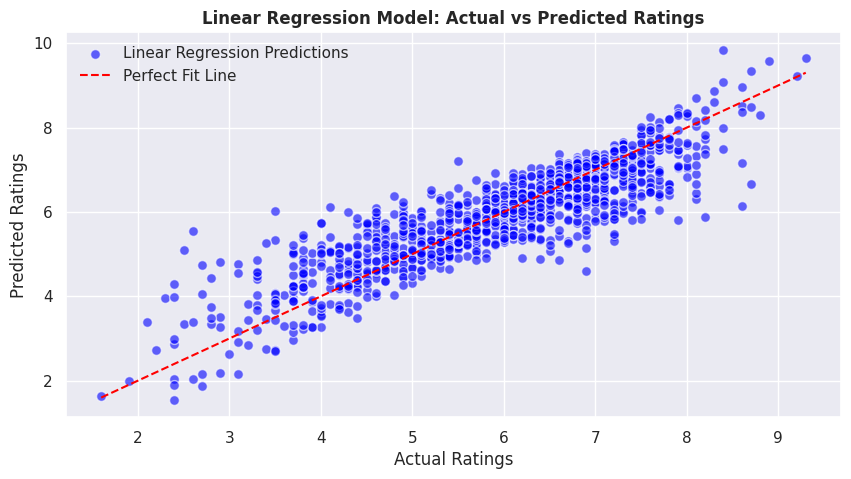

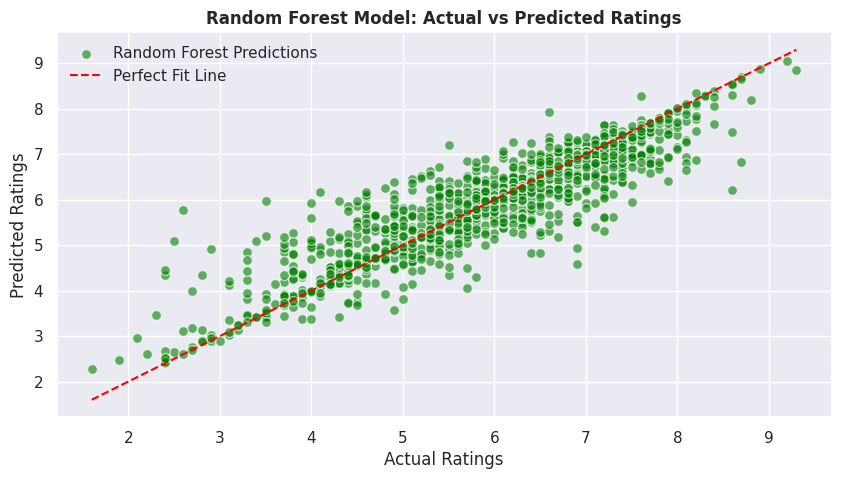

In [138]:
sns.set(style="darkgrid")

# Scatter plot for Linear Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, s=50, c='blue', edgecolors='w', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Linear Regression Model: Actual vs Predicted Ratings', fontsize=12, weight = "bold")
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("\n")

# Scatter plot for Random Forest model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, s=50, c='green', edgecolors='w', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Random Forest Model: Actual vs Predicted Ratings', fontsize=12, weight = "bold")
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Model Testing

In [143]:
X.head(10)

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,8,109.0,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,35,110.0,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,827,147.0,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142.0,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,326,82.0,5.477778,5.600000,5.600000,5.883333,5.600000
9,2014,11,116.0,5.337778,4.000000,4.000000,4.550000,4.000000
10,2004,17,96.0,6.415521,6.200000,5.480000,5.450000,5.233333
11,2016,59,120.0,4.648649,6.950000,6.066667,5.900000,5.900000
12,1991,983,161.0,5.400000,4.907143,5.187179,5.976190,5.041667
13,2012,512,166.0,5.765957,5.700000,6.300000,5.700000,5.700000


In [141]:
y.head(10)

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
9,4.0
10,6.2
11,5.9
12,6.5
13,5.7


In [149]:
# Create new trial dataframe for testing
data = {'Year': [2017],
        'Votes': [101],
        'Duration': [121],
        'Genre_Average_Rating': [7.0],
        'Director_Average_Rating': [4.5],
        'Actor1_Average_Rating': [6.5],
        'Actor2_Average_Rating': [8.8],
        'Actor3_Average_Rating': [8.3]}

trail_data = pd.DataFrame(data)
print(trail_data)

   Year  Votes  Duration  Genre_Average_Rating  Director_Average_Rating  \
0  2017    101       121                   7.0                      4.5   

   Actor1_Average_Rating  Actor2_Average_Rating  Actor3_Average_Rating  
0                    6.5                    8.8                    8.3  


In [150]:
# Predict rating using Random Forest model
predict_rating = fitted_model_rf.predict(trail_data)

# Output the predicted rating for the trial data
print('Predicted Rating for trial data: ', predict_rating[0])

Predicted Rating for trial data:  6.371000000000001


##### The predicted rating of 6.371 for the trial data falls within the range of ratings observed in the top 10 movies.

# Conclusion:

In this project, we developed two models, Linear Regression and Random Forest Regressor, to predict movie ratings. Based on our evaluation using key metrics, the Random Forest Regressor model consistently outperformed the Linear Regression model.

Specifically, the Random Forest model achieved an R-squared (R2) score of 0.812, indicating that it can explain approximately 81.2% of the variance in movie ratings. This demonstrates a strong ability to predict movie ratings accurately.

Furthermore, the Random Forest model exhibited lower error rates. Its Mean Squared Error (MSE) was 0.348 and Mean Absolute Error (MAE) was 0.404, significantly lower than the corresponding values for the Linear Regression model. These lower error values signify that the predicted ratings from the Random Forest model are closer to the actual ratings.

These results highlight the superiority of the Random Forest Regressor for predicting movie ratings in this context. The insights gained from this model can be valuable for stakeholders in the movie industry, such as producers, distributors, and marketing teams. They can leverage these insights to understand the factors that influence movie ratings and make more informed decisions regarding film production, marketing strategies, and audience targeting.